In [1]:
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from plotly.express import data
import matplotlib.pyplot as plt
from matplotlib import style
from pathlib import Path
import logging

In [3]:
pp=pd.read_excel('Superstore.xlsx',engine='openpyxl')
pp1 = pp[(pp['Segment'] == 'Consumer')]
[['Order Date', 'Segment', 'State', 'City',
  'Category', 'Sales', 'Profit']]
pp1.head()

,no,order _id,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,NaN,NaN,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6.0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


In [4]:
bd=pd.DataFrame(pp1.groupby(['Category','State']).agg({'Sales':'mean'})).reset_index()
bd

,Category,State,Sales
0,Furniture,Alabama,807.724000
1,Furniture,Arizona,246.577182
2,Furniture,Arkansas,402.228333
3,Furniture,California,312.081143
4,Furniture,Colorado,195.735080
...,...,...,...
126,Technology,Texas,330.666463
127,Technology,Utah,170.312000
128,Technology,Virginia,872.963889
129,Technology,Washington,590.816154


In [5]:
ofsp=bd[(bd['Category'] == 'Office Supplies')]
ofsp

,Category,State,Sales
44,Office Supplies,Alabama,138.398462
45,Office Supplies,Arizona,66.726388
46,Office Supplies,Arkansas,169.131905
47,Office Supplies,California,113.697462
48,Office Supplies,Colorado,94.543260
49,Office Supplies,Connecticut,96.393056
50,Office Supplies,Delaware,76.296071
51,Office Supplies,District of Columbia,16.130000
52,Office Supplies,Florida,63.646047
53,Office Supplies,Georgia,217.275818


In [6]:
class FileError(Exception):
    '''Custom File Handling Error Exception'''

Plot saved successfully as 'one.png'!


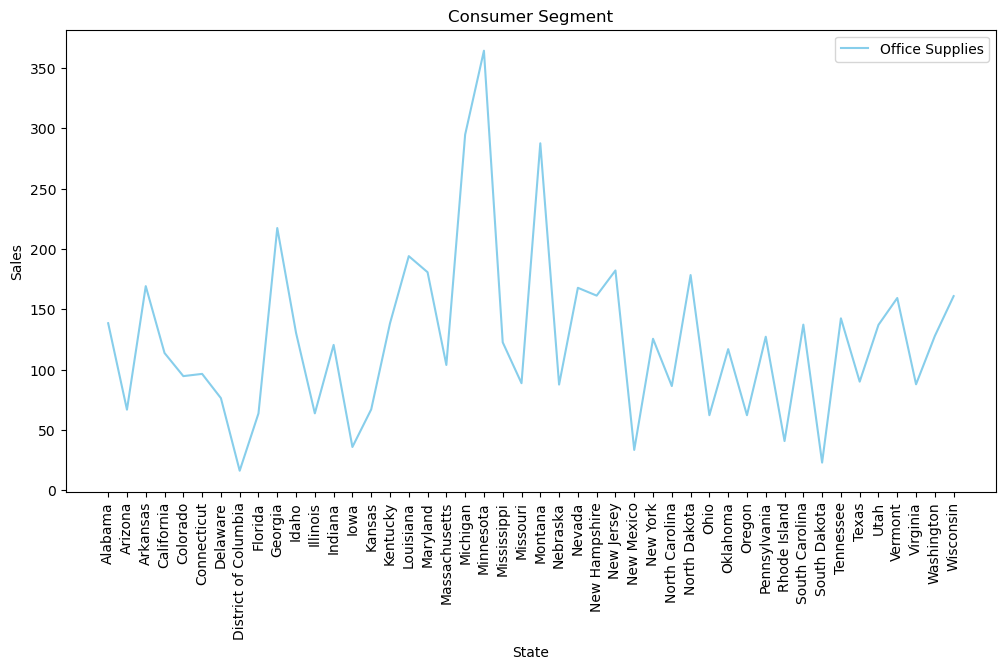

In [7]:
def save_file():
    fname = input("Enter the file name (with .png or .jpg extension): ").strip()
    logging.basicConfig(level=logging.INFO, 
                        filename="Graph.log", 
                        filemode="w",
                        format="%(asctime)s - %(levelname)s - %(message)s")
    if not fname.endswith(('.png','.jpg')):
        logging.warning('Issue with the provided extension, please check again!')
        raise ValueError("File name must end with .png or .jpg")
 
     
    plt.savefig(fname)
    print(f"Plot saved successfully as '{fname}'!")
    logging.info('Process Saved Successfully!')

try:
    plt.figure(figsize=(12, 6))
    x = ofsp['State']
    y = ofsp['Sales']
    plt.plot(x, y, label='Office Supplies', color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel('Sales')
    plt.title('Consumer Segment')
    plt.legend()
    
    save = input("Do you want to save the plot? (1.yes/2.no): ").strip()
    if save == '1':
        save_file()
    else:
        print("Plot not saved.")
        logging.error('Invalid Choice!')
        raise FileError("Invalid Option!")

    plt.show()
    
except FileError as e:
    print(f"An unexpected error occurred: {e}")
